
# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing dataset

In [2]:
import io
dataset = pd.read_csv('../input/framingham-heart-study-dataset/framingham.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

# Taking care of missing values

In [3]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(X)
X = imputer.transform(X)

# Splitting the dataset

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2
,random_state=0)

# Feature scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

# Traing logistic regression model

In [6]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

# Predicting results of test

In [7]:
y_pred = lg.predict(x_test)

# Accuracy

In [8]:
from sklearn.metrics import accuracy_score
print('Accuracy of my model ' ,accuracy_score(y_test,y_pred))

Accuracy of my model  0.8608490566037735


In [9]:
print("Current accuracy",accuracy_score(y_test,y_pred))

Current accuracy 0.8608490566037735


In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       722
           1       0.83      0.08      0.14       126

    accuracy                           0.86       848
   macro avg       0.85      0.54      0.53       848
weighted avg       0.86      0.86      0.81       848



# Confusion matrix

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[720   2]
 [116  10]]


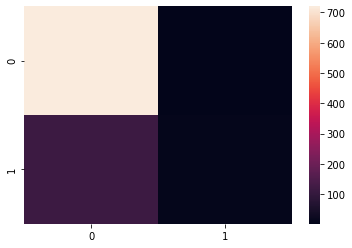

In [12]:
import seaborn as sns
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)))
plt.show()

## For all predictions , the model predicted **YES** for total(2+10)->12 times, out of which 10 were actual YES (meaning the person has a risk of getting CHD).

## The model predicted **YES** for total(720+116)-836 times, out of which 720 were actual NO (meaning the person dosent have a risk of getting CHD).